__Predicting stock prices__

Using SVM from scikit learn (rbf model) and including latest trade volume as a feature and using features scaled to (0, 1)

In [1]:
# all the necessary imports are done here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn
import math

In [2]:
# reading from csv file
data1 = pd.read_csv(r"stock_info\infosys.csv")
data2 = pd.read_csv(r"stock_info\HEROMOTOCO.NS.csv")
data3 = pd.read_csv(r"stock_info\tatasteel.csv")

In [3]:
def get_svm_data(_data, width = 10, wantToNormalize = False):
    """This method returns training data necessary for supervised learning using a moving window of specified width
    and including latest available trade volume"""
    i = 0
    total_data = []
    while i+width <= len(_data):
        total_data.append(_data.iloc[i:i+width]['Adj Close'].to_list())
        i += 1
    i = 0
    col = []
    while i < width:
        if i<width-1:
            col.append(str(i))
        else:
            col.append("Output")
        i += 1
    data_frame = pd.DataFrame(total_data, columns=col)
    
    # adding volume of trade on the last day to features
    data_frame['Volume'] = list(_data.iloc[(width-1):]['Volume'])
    
    # normalizing data set
    if wantToNormalize is True:
        scaler = sklearn.preprocessing.MinMaxScaler()
        names = data_frame.columns
        d = scaler.fit_transform(data_frame)
        data_frame = pd.DataFrame(d, columns = names)
        
        
    return data_frame

# getting data frames for using SVM
normalize = True
df1 = get_svm_data(data1, 5, normalize)
df2 = get_svm_data(data2, 5, normalize)
df3 = get_svm_data(data3, 5, normalize)

In [4]:
# making training and testing data sets
tr_cols1 = []
for i in range(len(df1.iloc[0])-2):
    tr_cols1.append(str(i))
tr_cols1.append('Volume')
    
tr_cols2 = []
for i in range(len(df2.iloc[0])-2):
    tr_cols2.append(str(i))
tr_cols2.append('Volume')
    
tr_cols3 = []
for i in range(len(df3.iloc[0])-2):
    tr_cols3.append(str(i))
tr_cols3.append('Volume')
    
break_point1 = 400

# for stock 1
training_inputs1 = df1.iloc[:break_point1][tr_cols1]
training_outputs1 = df1.iloc[:break_point1]['Output']

testing_inputs1 = df1.iloc[break_point1:][tr_cols1]
testing_outputs1 = df1.iloc[break_point1:]['Output']

break_point2 = 400

# for stock 2
training_inputs2 = df2.iloc[:break_point2][tr_cols2]
training_outputs2 = df2.iloc[:break_point2]['Output']

testing_inputs2 = df2.iloc[break_point2:][tr_cols2]
testing_outputs2 = df2.iloc[break_point2:]['Output']

break_point3 = 400

# for stock 3
training_inputs3 = df3.iloc[:break_point3][tr_cols3]
training_outputs3 = df3.iloc[:break_point3]['Output']

testing_inputs3 = df3.iloc[break_point3:][tr_cols3]
testing_outputs3 = df3.iloc[break_point3:]['Output']

In [5]:
# RBF (radial basis function) regression model
model1 = svm.SVR().fit(training_inputs1, training_outputs1)
model2 = svm.SVR().fit(training_inputs2, training_outputs2)
model3 = svm.SVR().fit(training_inputs3, training_outputs3)

RMS error 0.40573704212899975


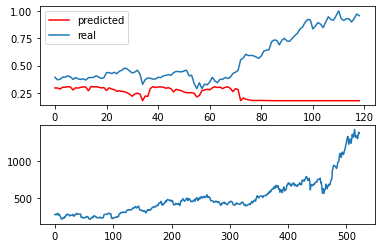

In [6]:
plotx = list(range(len(testing_inputs1)))
fig, axes = plt.subplots(2)
axes[0].plot(plotx, model1.predict(testing_inputs1), 'r')
axes[0].plot(plotx, testing_outputs1)
axes[0].legend(['predicted', 'real'])

axes[1].plot(data1['Adj Close'])

# printing rms error
print("RMS error", math.sqrt(sklearn.metrics.mean_squared_error(testing_outputs1, model1.predict(testing_inputs1))))

RMS error 0.05429852169374608


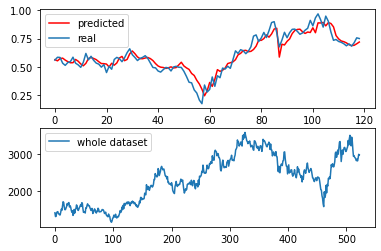

In [7]:
plotx = list(range(len(testing_inputs2)))
fig, axes = plt.subplots(2)
axes[0].plot(plotx, model2.predict(testing_inputs2), 'r')
axes[0].plot(plotx, testing_outputs2)
axes[0].legend(['predicted', 'real'])

axes[1].plot(data2['Adj Close'])
axes[1].legend(['whole dataset'])

# printing rms error
print("RMS error", math.sqrt(sklearn.metrics.mean_squared_error(testing_outputs2, model2.predict(testing_inputs2))))

Predictions for this stock are much better than others

RMS error 0.19161125457578454


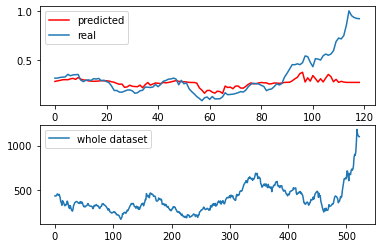

In [8]:
plotx = list(range(len(testing_inputs3)))
fig, axes = plt.subplots(2)
axes[0].plot(plotx, model3.predict(testing_inputs3), 'r')
axes[0].plot(plotx, testing_outputs3)
axes[0].legend(['predicted', 'real'])

axes[1].plot(data3['Adj Close'])
axes[1].legend(['whole dataset'])

# printing rms error
print("RMS error", math.sqrt(sklearn.metrics.mean_squared_error(testing_outputs3, model3.predict(testing_inputs3))))

__Conclusions:__

Performance of prediction did not improve after including latest trade volume as a feature. In fact it degraded a little bit compared to when trade volume is not used as a feature.